In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,54.795662,4.700777,11.913511,21.856350,25.382661
1,43.093928,3.632844,5.941556,8.130920,18.470365
2,53.931968,3.043291,13.053933,9.290520,19.265070
3,52.680287,4.368567,8.950266,-1.317558,20.660669
4,50.678372,9.016866,11.511051,11.723668,20.478885


<AxesSubplot:ylabel='Density'>

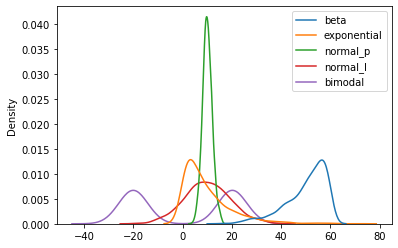

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.208747,9.868298,10.039177,10.028732,0.144560
std,8.292892,9.990282,1.941926,9.238157,20.424955
min,16.201960,0.006510,3.971183,-18.389516,-29.541616
25%,45.861979,2.676350,8.750472,3.919498,-20.105642
50%,52.416616,6.774416,9.980147,9.855818,-0.113668
75%,56.628707,13.652640,11.337168,16.218420,20.145115
max,59.998031,71.074283,15.890778,38.642529,30.353211


<AxesSubplot:ylabel='Density'>

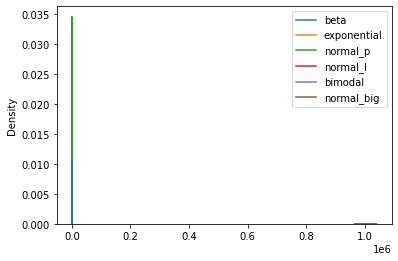

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

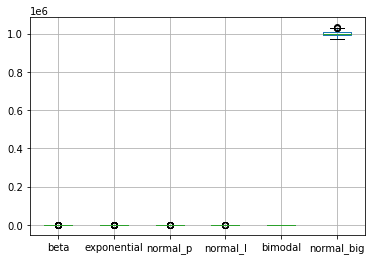

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df)

# Lấy danh sách các cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.553391,-0.517514,0.965677,1.280941,1.236269,-1.054745
1,-0.858371,-0.624464,-2.111137,-0.205535,0.897675,-1.708592
2,0.449190,-0.683506,1.553234,-0.079949,0.936603,0.637265
3,0.298180,-0.550784,-0.561018,-1.228813,1.004965,1.200223
4,0.056658,-0.085269,0.758325,0.183563,0.996061,-0.963949


<AxesSubplot:ylabel='Density'>

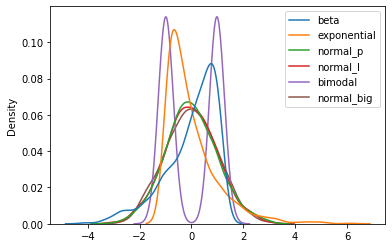

In [11]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [ ]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

<AxesSubplot:>

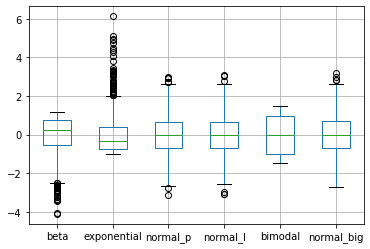

In [12]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()